In [1]:
#import required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')



In [2]:
#Read the CSV files, 
#low_memory=False options helps to suppress DtypeWarning related to mixed data types

df = pd.read_csv("loan.csv", low_memory=False)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Check for null values
null_counts = df.isnull().sum()

# Get more info about the data
dataset_info = df.info(verbose = True)
dataset_shape = df.shape
data_types = df.dtypes

print("\nNull Values:")
print(null_counts)
print("\nDataset Information:")
print(dataset_info)
print("\nDataset Shape:", dataset_shape)
print("\nData Types:")
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

## Data Cleaning
### NULL value treatment

In [6]:
#check the null value
#display entire row and columns without any limits, to check for any null values

null_summary = df.isnull().sum()
null_summary

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Calcultate null summary in percentage, and display if null values are more than 60%
null_percentage = (df.isnull().sum() / len(df)) * 100

null_percentage = null_percentage[null_percentage.values > 60]
null_percentage

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

In [8]:
#Let's drop it as it will not add any insights due to data not avaialbe
columns_to_drop = null_percentage.index
clean_df = df.drop(columns=list(columns_to_drop))
clean_df.shape

(39717, 54)

In [9]:
#check for the unique values and drop it
columns_with_unique_value = clean_df.nunique()
# print(columns_with_unique_value)

#filer cols with single value
c1 = columns_with_unique_value[columns_with_unique_value.values == 1]

#drop it
clean_df = clean_df.drop(columns=list(c1.index))
clean_df.shape

(39717, 45)

In [10]:
cols_to_drop = []

# checking if all values in column are same or all are unique
for col in clean_df.columns:
   if clean_df[col].nunique() == 1 or not clean_df[col].duplicated().any():
        cols_to_drop.append(col)

clean_df = clean_df.drop(columns = cols_to_drop)
clean_df.shape

(39717, 42)

### Droppin the unnessary variables which will not play significant role for deciding the loan decision
- emp_title : text scatter value
- desc : text value
- title : text
- sub_grade : grade would be enough to know
- zip_code : not completed data, hence droping it, addr_state are on similar lines
- out_prncp : (Remaining outstanding principal for total amount funded), post loan params
- out_prncp_inv : similar as out_prncp
- total_pymnt : seems a Post loan prams
- total_pymnt_inv : Post loan
- total_rec_prncp : Post loan
- total_rec_int : Post loan
- total_rec_late_fee : Post loan
- recoveries : Post loan
- collection_recovery_fee : Post loan
- last_pymnt_d : Post loan
- last_pymnt_amnt : Post Loan
- last_credit_pull_d : undecided factor
- pub_rec_bankruptcies : undecided factor



In [12]:
columns_to_delete = ["emp_title", "desc", "title", "sub_grade", "zip_code", "out_prncp", "out_prncp_inv", "total_pymnt",
                      "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
                      "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "inq_last_6mths", 
                      "earliest_cr_line", "delinq_2yrs", "pub_rec_bankruptcies"]
clean_df = clean_df.drop(columns=columns_to_delete)
clean_df.shape

(39717, 21)

In [13]:
#Knowing all the columns with missing value
clean_df.isnull().any()

loan_amnt              False
funded_amnt            False
funded_amnt_inv        False
term                   False
int_rate               False
installment            False
grade                  False
emp_length              True
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
purpose                False
addr_state             False
dti                    False
open_acc               False
pub_rec                False
revol_bal              False
revol_util              True
total_acc              False
dtype: bool

### In below steps will understand emp_length column and impute the missing value

In [15]:
#Describing the column
clean_df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [16]:
#As emp_length is a categorical variable Calculating mode value to impute the missing value
clean_df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [17]:
clean_df['emp_length'] = clean_df['emp_length'].apply(lambda x : '10+ years' if pd.isnull(x) else x )

#Converting the string to more understandable value
def convert_emp_length(val) -> int :
    if(val == '< 1 year'):
        return '0'

    elif(val == '10+ years'):
        return '11'
    else:
        return val.strip().split(' ')[0]

clean_df['emp_length'] = clean_df['emp_length'].apply(convert_emp_length)
clean_df['emp_length'].describe()


count     39717
unique       11
top          11
freq       9954
Name: emp_length, dtype: object

### In below steps will understand revol_util column and impute the missing value

In [19]:
#Describing the column
clean_df['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [20]:
#Striping the % value 
clean_df['revol_util'] = clean_df['revol_util'].str.rstrip('%').astype(float)

In [21]:
#Calculating Median for imputing the missing values
clean_df['revol_util'].median()

49.3

In [22]:
#Imputing the null values 
clean_df['revol_util'] = clean_df['revol_util'].apply(lambda x : 49.1 if pd.isnull(x) else x )

In [23]:
#removing % character in intrest_rate column
clean_df['int_rate'].describe()
clean_df['int_rate'] = clean_df['int_rate'].str.rstrip('%').astype(float)

In [24]:
#Analysing skewness all numerical columns
from scipy.stats import skew
number_columns = clean_df.select_dtypes(include=['int', 'float']).columns
for column in number_columns:
    skewness = skew(clean_df[column])
    print(f"column {column} Skewness: {skewness}")

column loan_amnt Skewness: 1.0592772817425895
column funded_amnt Skewness: 1.0816693847388785
column funded_amnt_inv Skewness: 1.1061711593135954
column int_rate Skewness: 0.2937175831478231
column installment Skewness: 1.1283764775683778
column annual_inc Skewness: 30.948015724561007
column dti Skewness: -0.0280422718226278
column open_acc Skewness: 1.0037240007125097
column pub_rec Skewness: 4.537879924685415
column revol_bal Skewness: 3.190763171310741
column revol_util Skewness: -0.03363416977621836
column total_acc Skewness: 0.8273478373296154


### As Annual income is highly skewed in below section will be normalising and removing outiners

In [26]:
clean_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [27]:
# Removing outliers from annual_inc

# Calculate the IQR
Q1 = clean_df['annual_inc'].quantile(0.25)
Q3 = clean_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_df = clean_df[(clean_df['annual_inc'] >= lower_bound) & (clean_df['annual_inc'] <= upper_bound)]

clean_df['annual_inc'].describe()

count     37874.000000
mean      61360.038960
std       28210.186388
min        4000.000000
25%       40000.000000
50%       56178.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [28]:
#converting issue data to proper date time format for analysis and adding issues_year and issue_month for more analysis
clean_df['issue_d'].describe()
clean_df['issue_d'] = pd.to_datetime(clean_df['issue_d'], format='%b-%y')
clean_df['issue_month'] = clean_df['issue_d'].dt.month
clean_df['issue_year'] = clean_df['issue_d'].dt.year
clean_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,11,RENT,24000.0,...,credit_card,AZ,27.65,3,0,13648,83.7,9,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,car,GA,1.00,3,0,1687,9.4,4,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,11,RENT,12252.0,...,small_business,IL,8.72,2,0,2956,98.5,10,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,11,RENT,49200.0,...,other,CA,20.00,10,0,5598,21.0,37,12,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,...,other,OR,17.94,15,0,27783,53.9,38,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,36 months,8.70,158.30,B,5,MORTGAGE,75000.0,...,credit_card,CO,15.55,10,0,66033,23.0,29,7,2007
39712,2500,2500,1075.0,36 months,8.07,78.42,A,4,MORTGAGE,110000.0,...,home_improvement,CO,11.33,13,0,7274,13.1,40,7,2007
39713,8500,8500,875.0,36 months,10.28,275.38,C,3,RENT,18000.0,...,credit_card,NC,6.40,6,0,8847,26.9,9,7,2007
39714,5000,5000,1325.0,36 months,8.07,156.84,A,0,MORTGAGE,100000.0,...,debt_consolidation,MA,2.30,11,0,9698,19.4,20,7,2007


In [29]:
clean_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'issue_month', 'issue_year'],
      dtype='object')

# Univariant Analysis

### Analysis of categorical variables


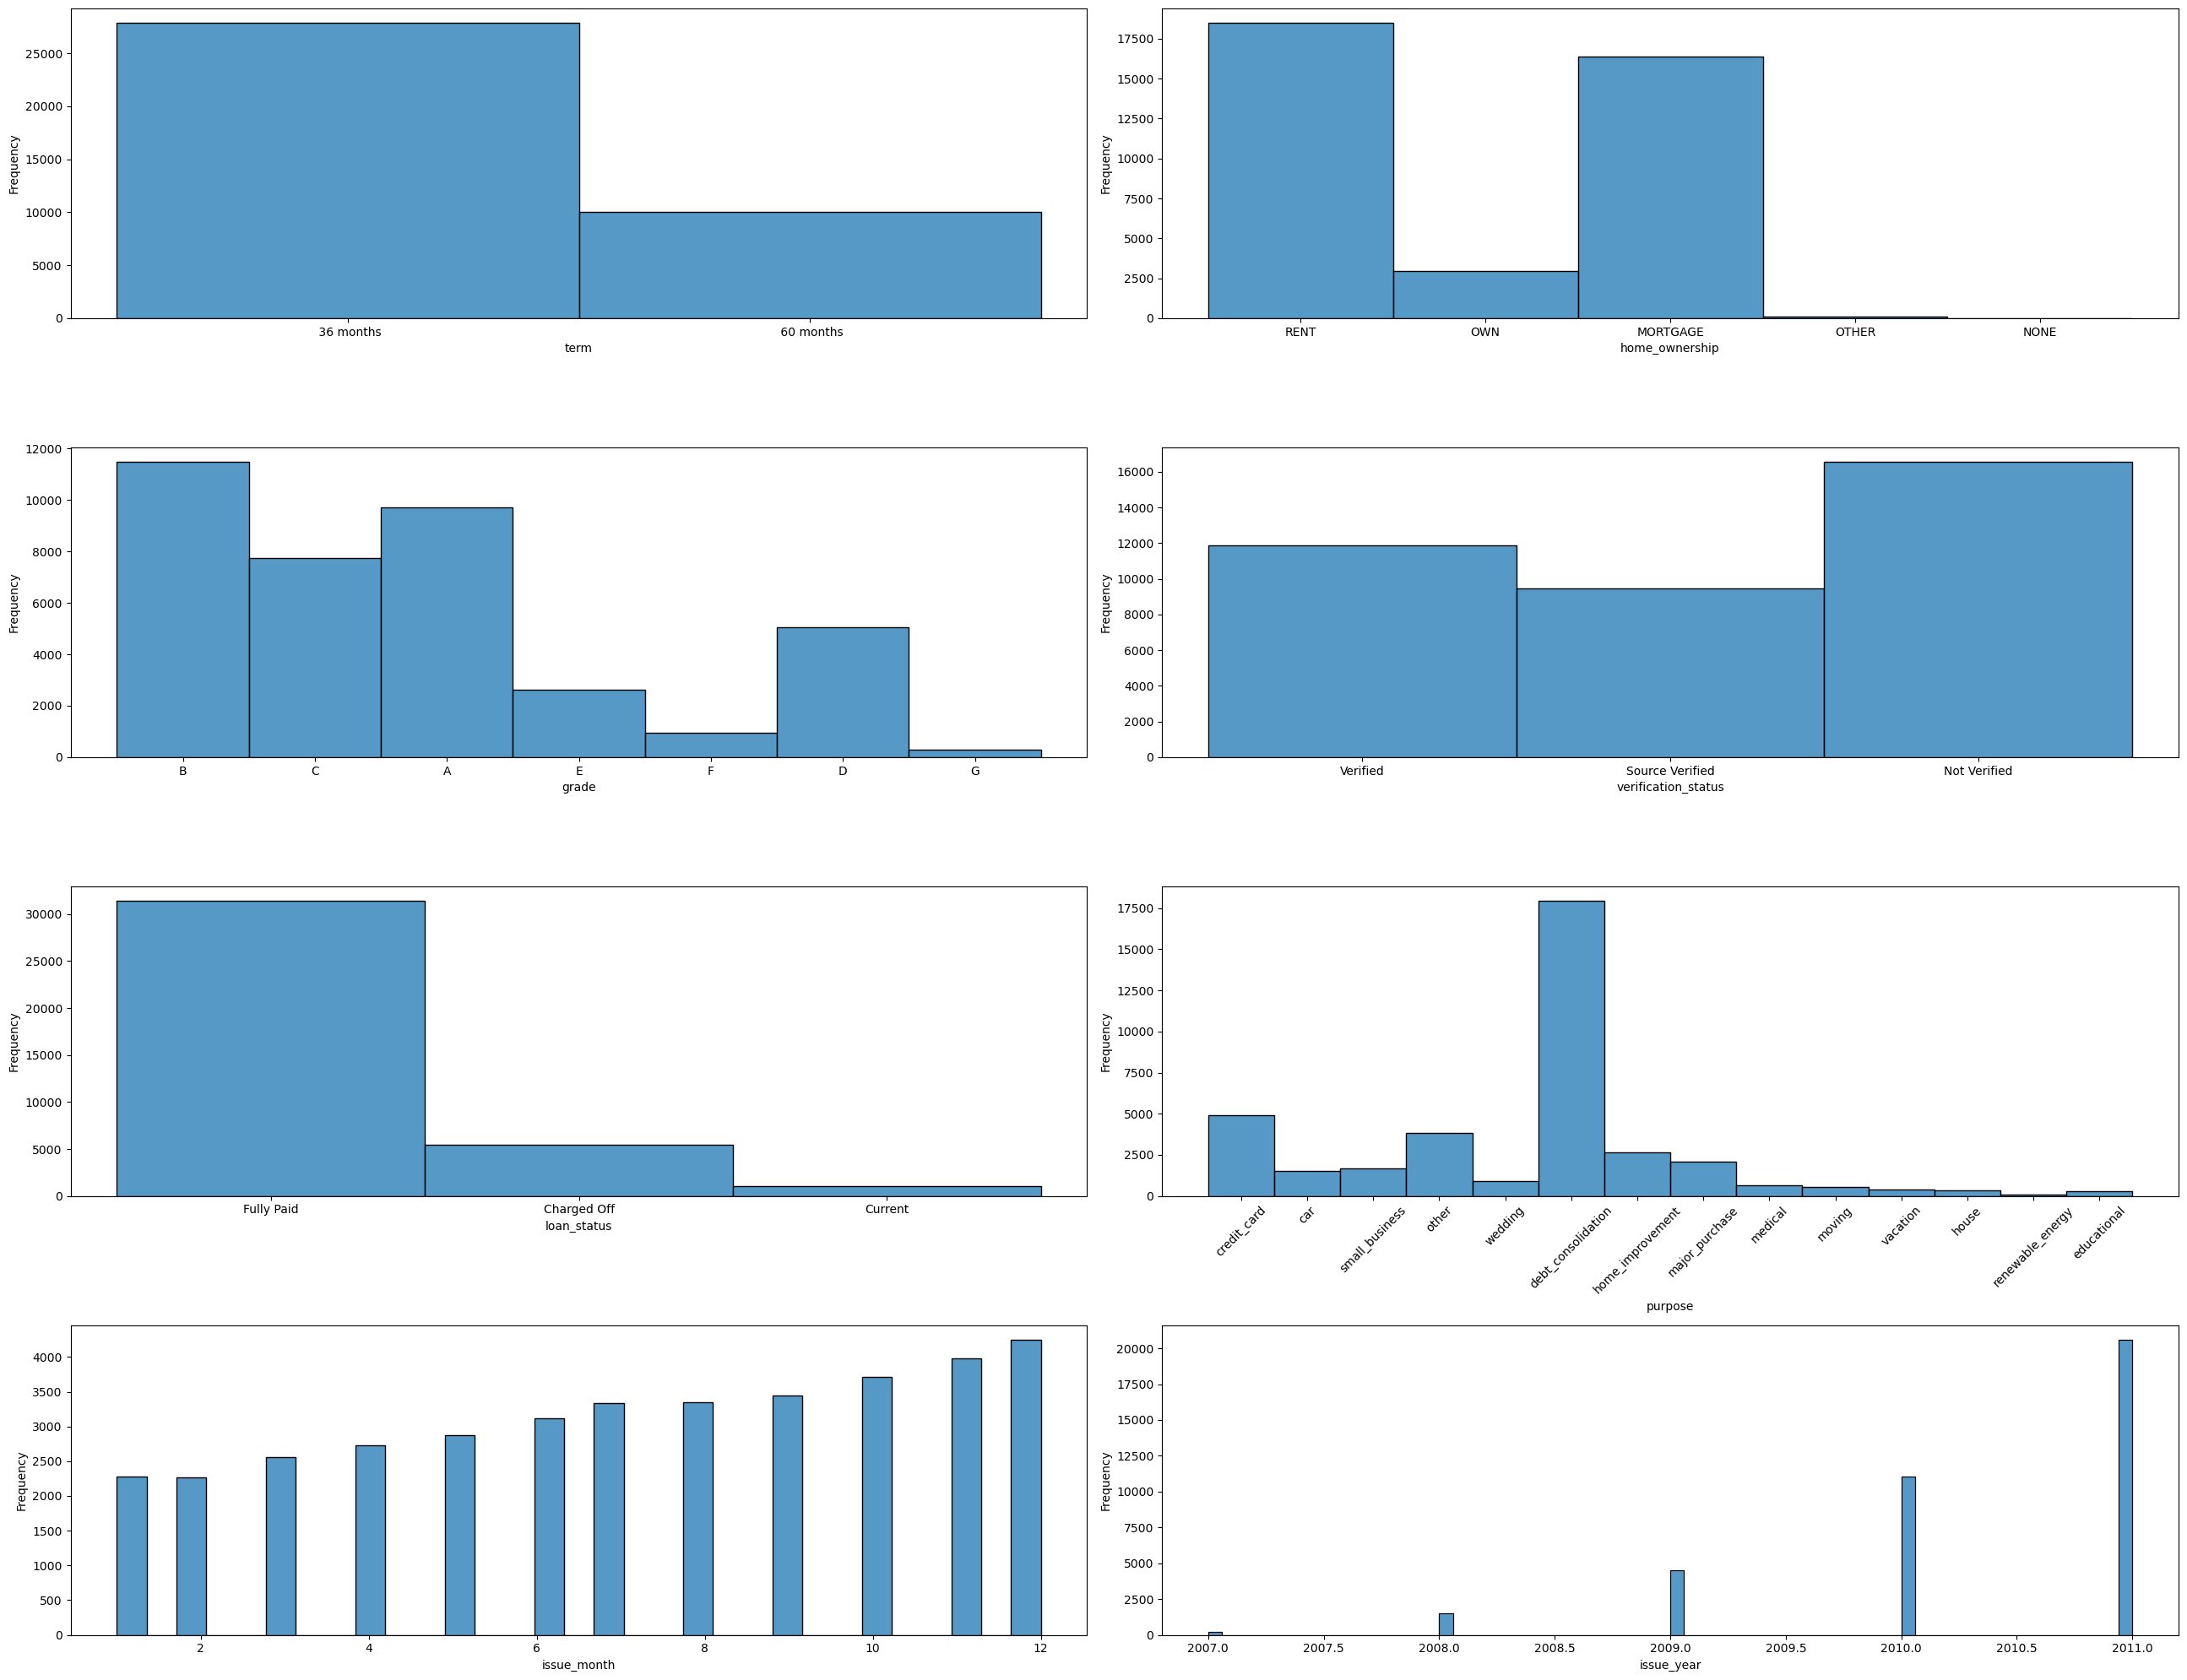

In [32]:
fig, axis = plt.subplots(4, 2, figsize = (26,20))

sns.histplot(ax = axis[0, 0], data = clean_df, x = 'term').set(ylabel = "Frequency")
sns.histplot(ax = axis[0, 1], data = clean_df, x = 'home_ownership').set(ylabel = "Frequency")
sns.histplot(ax = axis[1, 0], data = clean_df, x = 'grade').set(ylabel = "Frequency")
sns.histplot(ax = axis[1, 1], data = clean_df, x = 'verification_status').set(ylabel = "Frequency")
sns.histplot(ax = axis[2, 0], data = clean_df, x = 'loan_status').set(ylabel = "Frequency")
sns.histplot(ax = axis[2, 1], data = clean_df, x = 'purpose').set(ylabel = "Frequency")
sns.histplot(ax = axis[3, 0], data = clean_df, x = 'issue_month').set(ylabel = "Frequency")
sns.histplot(ax = axis[3, 1], data = clean_df, x = 'issue_year').set(ylabel = "Frequency")

# Rotate labels for 'purpose' and 'addr_state'
plt.setp(axis[2, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

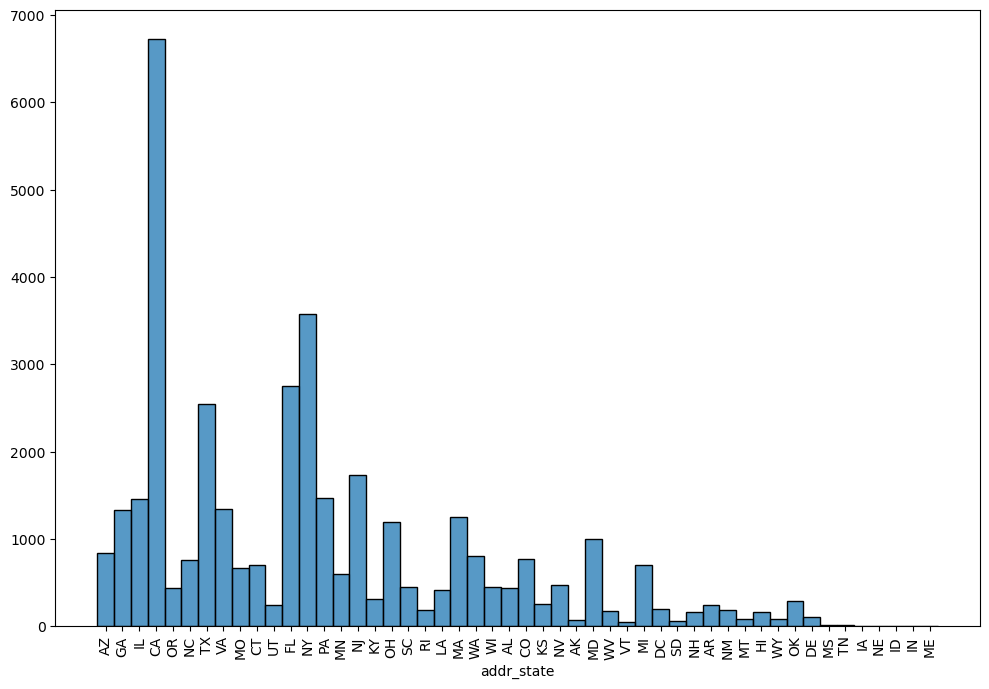

In [33]:
fig, axis = plt.subplots(1, 1, figsize=(10, 7))

# Plot the histogram for 'addr_state'
sns.histplot(ax=axis, data=clean_df, x='addr_state').set(ylabel=None)

# Rotate the x-axis labels
plt.setp(axis.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Analysis of Numerical Variables


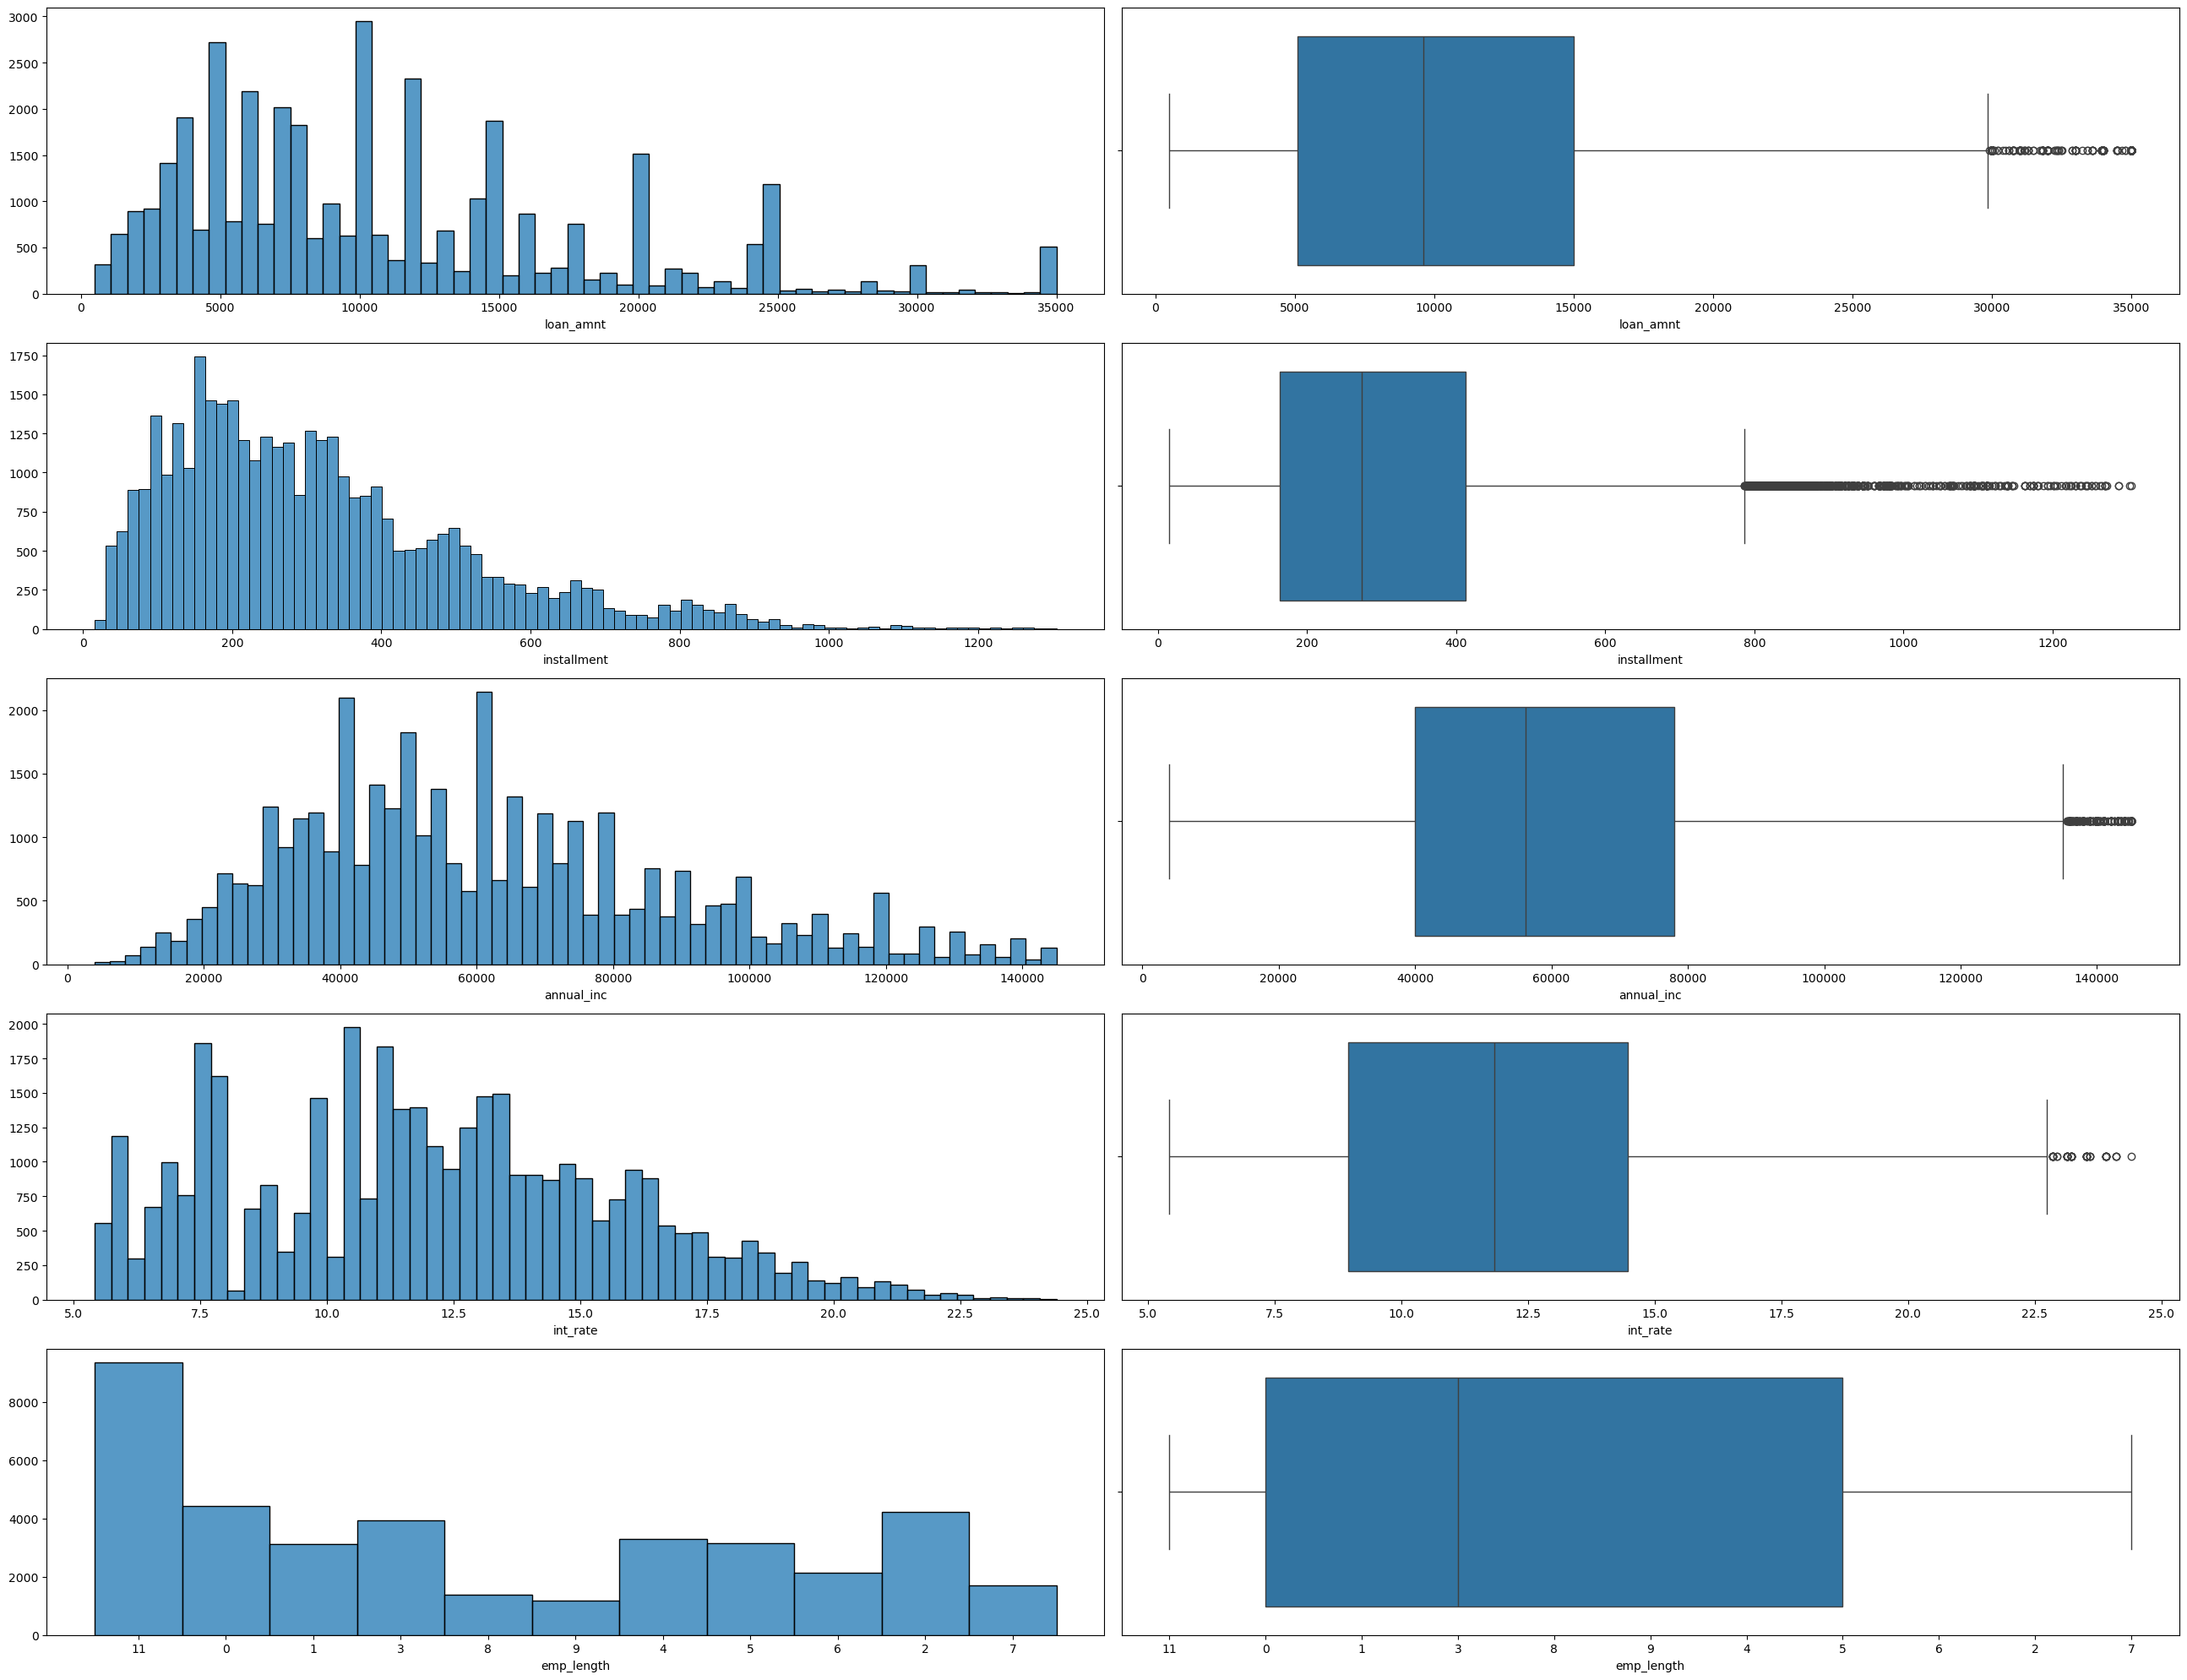

In [35]:
fig, axis = plt.subplots(5, 2, figsize = (26,20))

sns.histplot(ax = axis[0, 0], data = clean_df, x = 'loan_amnt').set(ylabel = None)
sns.boxplot(ax = axis[0,1], data = clean_df, x = 'loan_amnt')
sns.histplot(ax = axis[1, 0], data = clean_df, x = 'installment').set(ylabel = None)
sns.boxplot(ax = axis[1,1], data = clean_df, x = 'installment')
sns.histplot(ax = axis[2, 0], data = clean_df, x = 'annual_inc').set(ylabel = None)
sns.boxplot(ax = axis[2,1], data = clean_df, x = 'annual_inc')
sns.histplot(ax = axis[3, 0], data = clean_df, x = 'int_rate').set(ylabel = None)
sns.boxplot(ax = axis[3,1], data = clean_df, x = 'int_rate')
sns.histplot(ax = axis[4, 0], data = clean_df, x = 'emp_length').set(ylabel = None)
sns.boxplot(ax = axis[4,1], data = clean_df, x = 'emp_length')

plt.tight_layout()

plt.show()

## Segmented Univariant Analysis


In [37]:
# Filtering Data on basis of loan status & removing current users
clean_df = clean_df[clean_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

clean_df['loan_status'].value_counts()

loan_status
Fully Paid     31386
Charged Off     5431
Name: count, dtype: int64

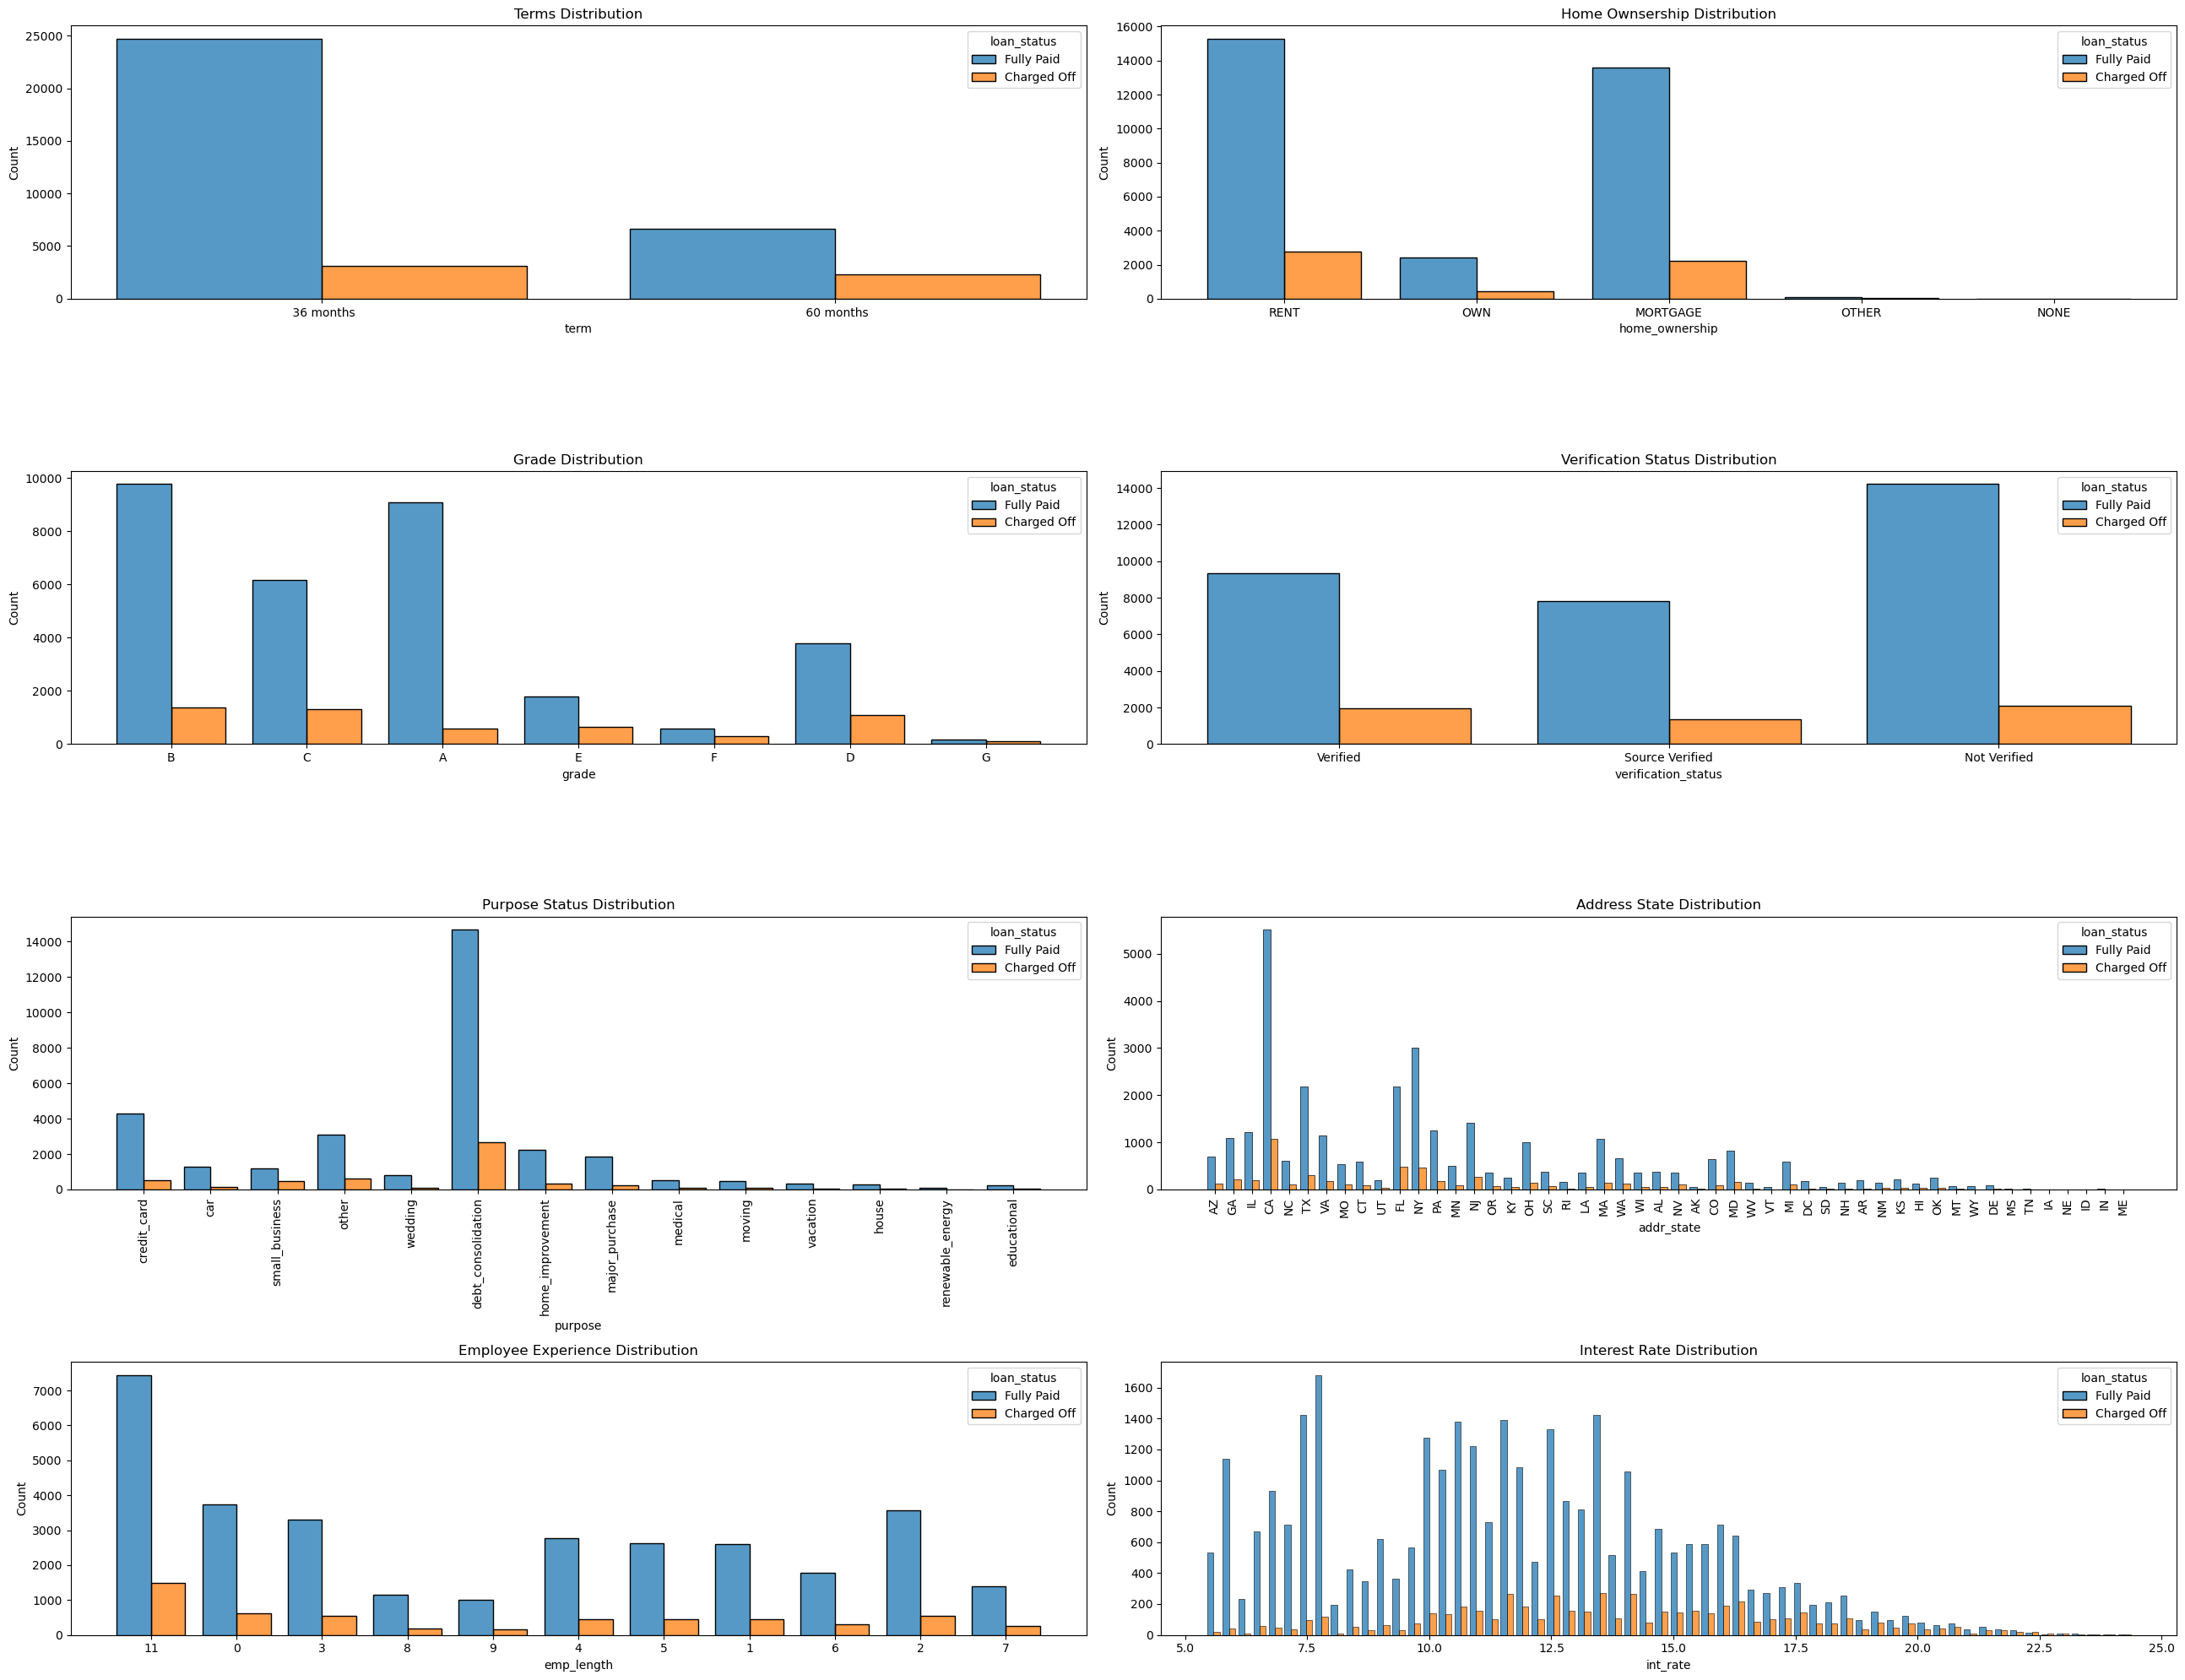

In [38]:
fig, axis = plt.subplots(4, 2, figsize = (26,20))

sns.histplot(data=clean_df, x='term', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[0,0])
axis[0,0].set_title('Terms Distribution')
sns.histplot(data=clean_df, x='home_ownership', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[0,1])
axis[0,1].set_title('Home Ownsership Distribution')
sns.histplot(data=clean_df, x='grade', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[1,0])
axis[1,0].set_title('Grade Distribution')
sns.histplot(data=clean_df, x='verification_status', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[1,1])
axis[1,1].set_title('Verification Status Distribution')
sns.histplot(data=clean_df, x='purpose', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[2,0])
axis[2,0].set_title('Purpose Status Distribution')
sns.histplot(data=clean_df, x='addr_state', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[2,1])
axis[2,1].set_title('Address State Distribution')
sns.histplot(data=clean_df, x='emp_length', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[3,0])
axis[3,0].set_title('Employee Experience Distribution')
sns.histplot(data=clean_df, x='int_rate', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[3,1])
axis[3,1].set_title('Interest Rate Distribution')

# Rotate labels for 'purpose' and 'addr_state'
plt.setp(axis[2, 0].get_xticklabels(), rotation=90)
plt.setp(axis[2, 1].get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

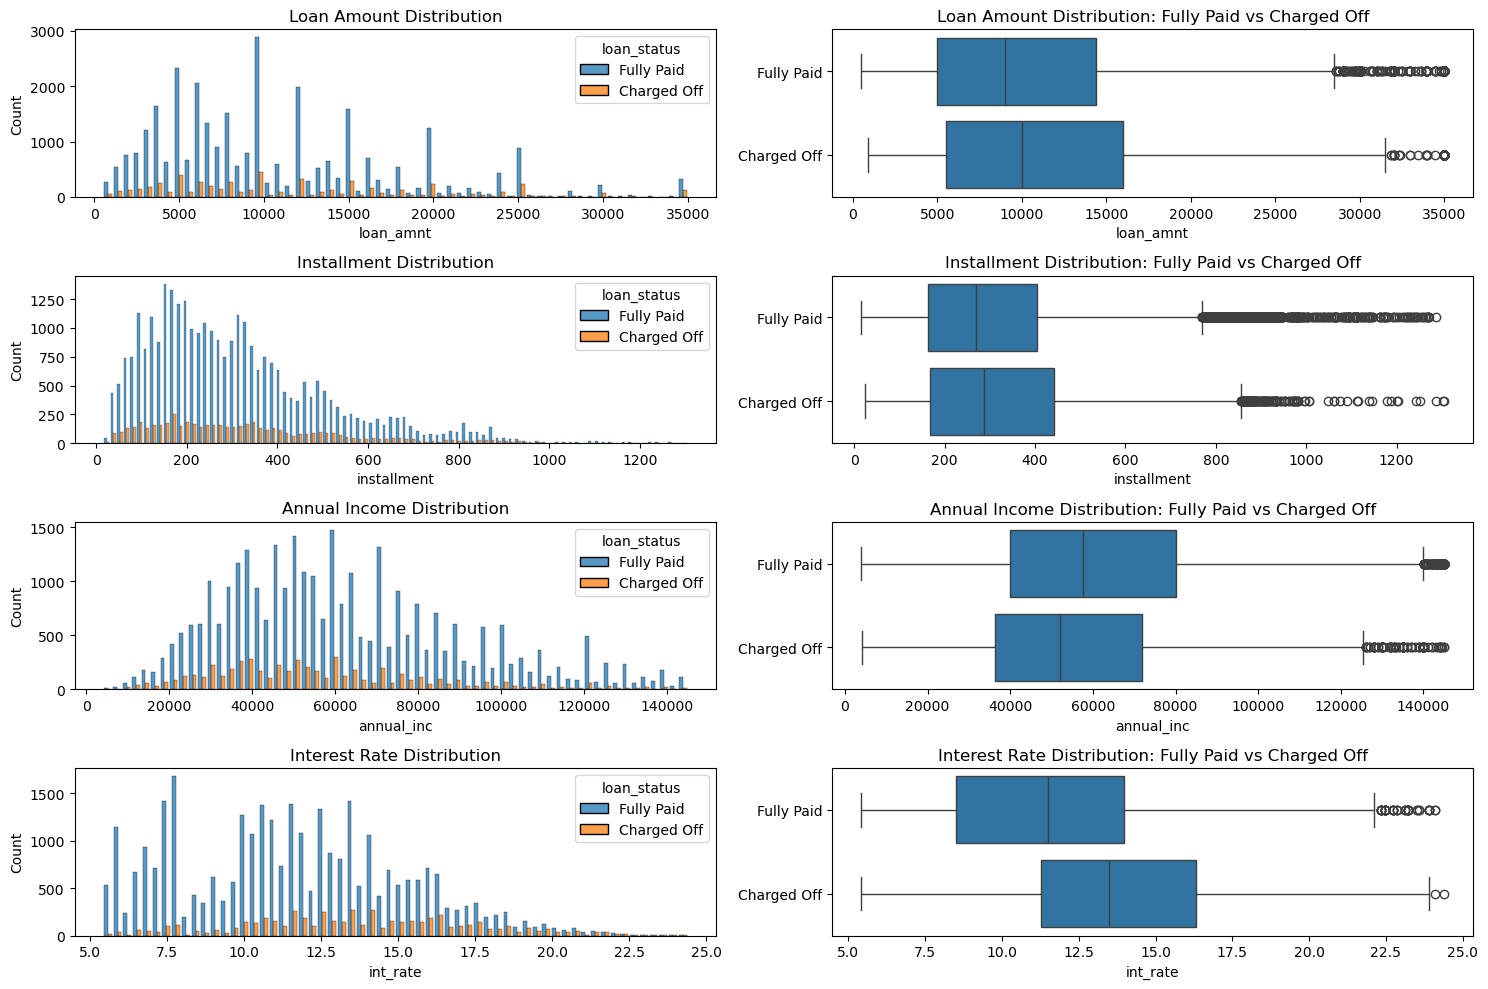

In [39]:
fig, axis = plt.subplots(4, 2, figsize = (15,10))


sns.histplot(data=clean_df, x='loan_amnt', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[0,0])
axis[0,0].set_title('Loan Amount Distribution')
sns.boxplot(data=clean_df, x='loan_amnt', y='loan_status', ax=axis[0,1]).set(ylabel = None)
axis[0,1].set_title('Loan Amount Distribution: Fully Paid vs Charged Off')

sns.histplot(data=clean_df, x='installment', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[1,0])
axis[1,0].set_title('Installment Distribution')
sns.boxplot(data=clean_df, x='installment', y='loan_status', ax=axis[1,1]).set(ylabel = None)
axis[1,1].set_title('Installment Distribution: Fully Paid vs Charged Off')

sns.histplot(data=clean_df, x='annual_inc', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[2,0])
axis[2,0].set_title('Annual Income Distribution')
sns.boxplot(data=clean_df, x='annual_inc', y='loan_status', ax=axis[2,1]).set(ylabel = None)
axis[2,1].set_title('Annual Income Distribution: Fully Paid vs Charged Off')

sns.histplot(data=clean_df, x='int_rate', hue='loan_status', multiple='dodge', shrink=0.8, ax=axis[3,0])
axis[3,0].set_title('Interest Rate Distribution')
sns.boxplot(data=clean_df, x='int_rate', y='loan_status', ax=axis[3,1]).set(ylabel = None)
axis[3,1].set_title('Interest Rate Distribution: Fully Paid vs Charged Off')

plt.tight_layout()

plt.show()

# Bivariant Analysis

In [41]:
#Creating Definition for Percentage Calculation for loan status, loan status bar chart, hisplot inorder to minimize the coding
def loanstatusdef(x,y):
    plt.subplots(figsize=(20, 8))
    plt.tight_layout() 
    key_vs_loan = clean_df.groupby([x, y], observed=True )[y].count().unstack().reset_index()
    key_vs_loan['Charged Off']= key_vs_loan['Charged Off'].fillna(0)
    key_vs_loan['Fully Paid']=key_vs_loan['Fully Paid'].fillna(0)
    key_vs_loan['Total']=key_vs_loan['Charged Off']+key_vs_loan['Fully Paid']
    key_vs_loan['Chargedoff_Proportion'] = key_vs_loan['Charged Off']*100/key_vs_loan['Total']
    key_vs_loan['FullPaid_Proportion'] = key_vs_loan['Fully Paid']*100/key_vs_loan['Total']
    perctable=key_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
    percchart=sns.barplot(x=x, y='Chargedoff_Proportion', data=key_vs_loan)
    plt.show()
    return perctable,percchart

In [42]:
#Analysing how annual income has varies with different parameter by binning it
clean_df['annual_inc_bin']=pd.cut(clean_df['annual_inc'], [0,20000,40000,60000,80000,100000,120000,160000], labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-160000'])
clean_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_month,issue_year,annual_inc_bin
0,5000,5000,4975.0,36 months,10.65,162.87,B,11,RENT,24000.0,...,AZ,27.65,3,0,13648,83.7,9,12,2011,20000-40000
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,GA,1.00,3,0,1687,9.4,4,12,2011,20000-40000
2,2400,2400,2400.0,36 months,15.96,84.33,C,11,RENT,12252.0,...,IL,8.72,2,0,2956,98.5,10,12,2011,0-20000
3,10000,10000,10000.0,36 months,13.49,339.31,C,11,RENT,49200.0,...,CA,20.00,10,0,5598,21.0,37,12,2011,40000-60000
5,5000,5000,5000.0,36 months,7.90,156.46,A,3,RENT,36000.0,...,AZ,11.20,9,0,7963,28.3,12,12,2011,20000-40000


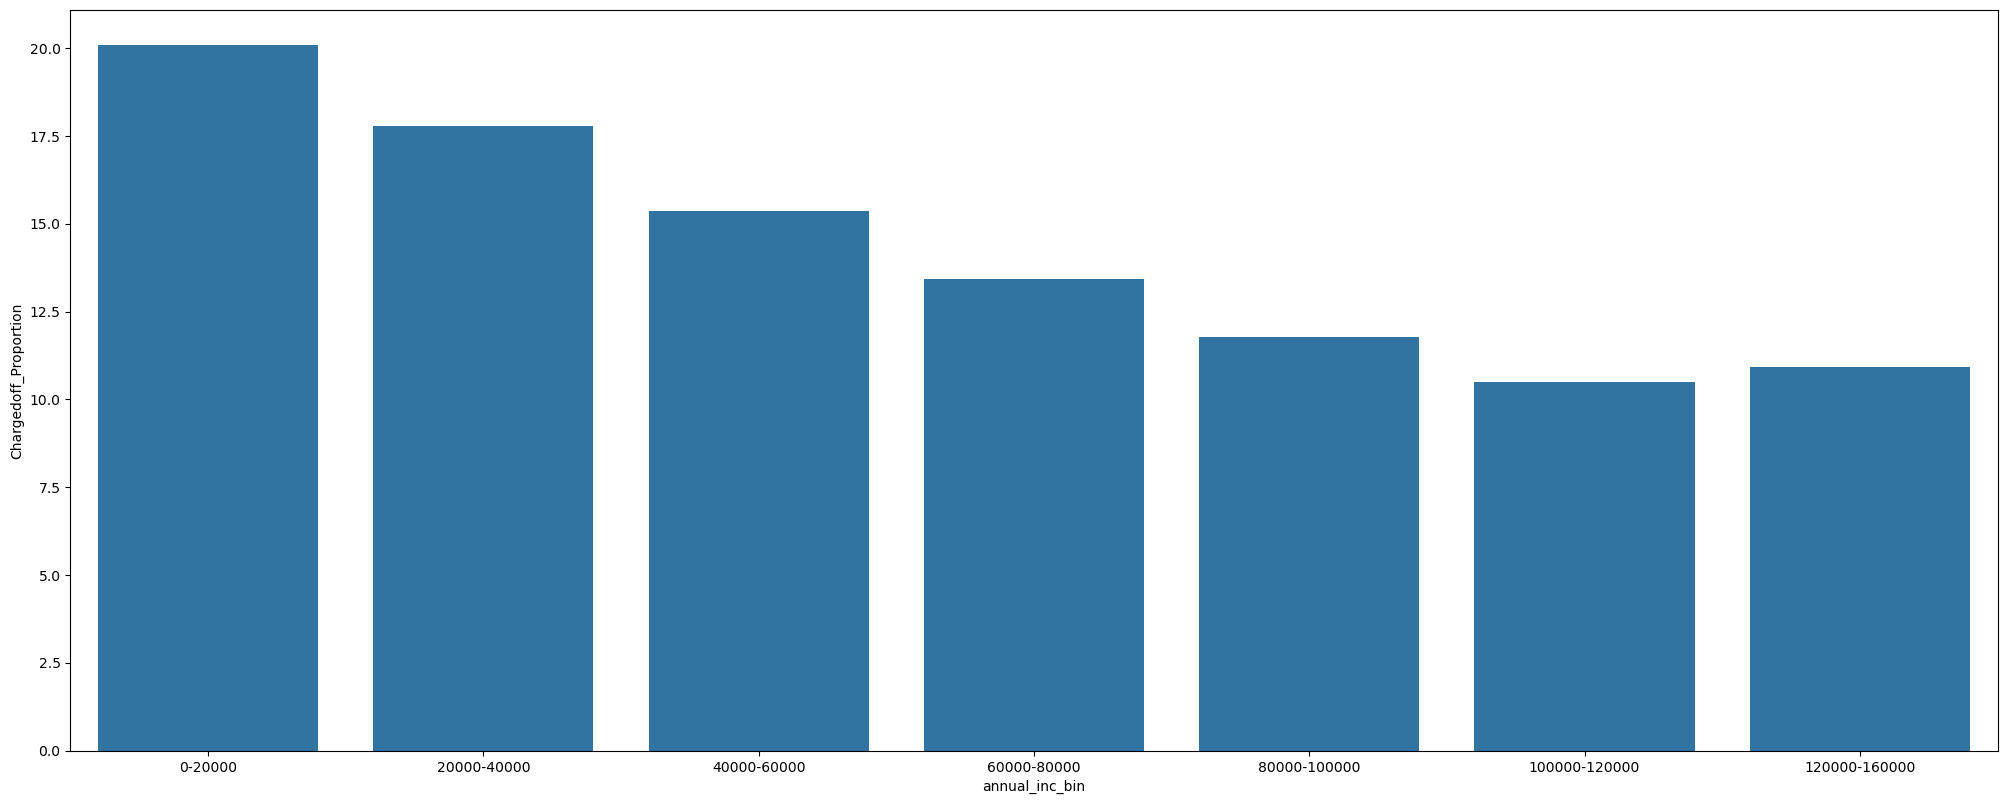

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
0,0-20000,237,943,1180,20.084746,79.915254
1,20000-40000,1514,7004,8518,17.774125,82.225875
2,40000-60000,1729,9534,11263,15.351150,84.648850
3,60000-80000,1024,6597,7621,13.436557,86.563443
4,80000-100000,531,3983,4514,11.763403,88.236597
6,120000-160000,152,1241,1393,10.911701,89.088299
5,100000-120000,244,2084,2328,10.481100,89.518900


In [43]:
tab,char=loanstatusdef('annual_inc_bin', 'loan_status')
pd.DataFrame(tab)

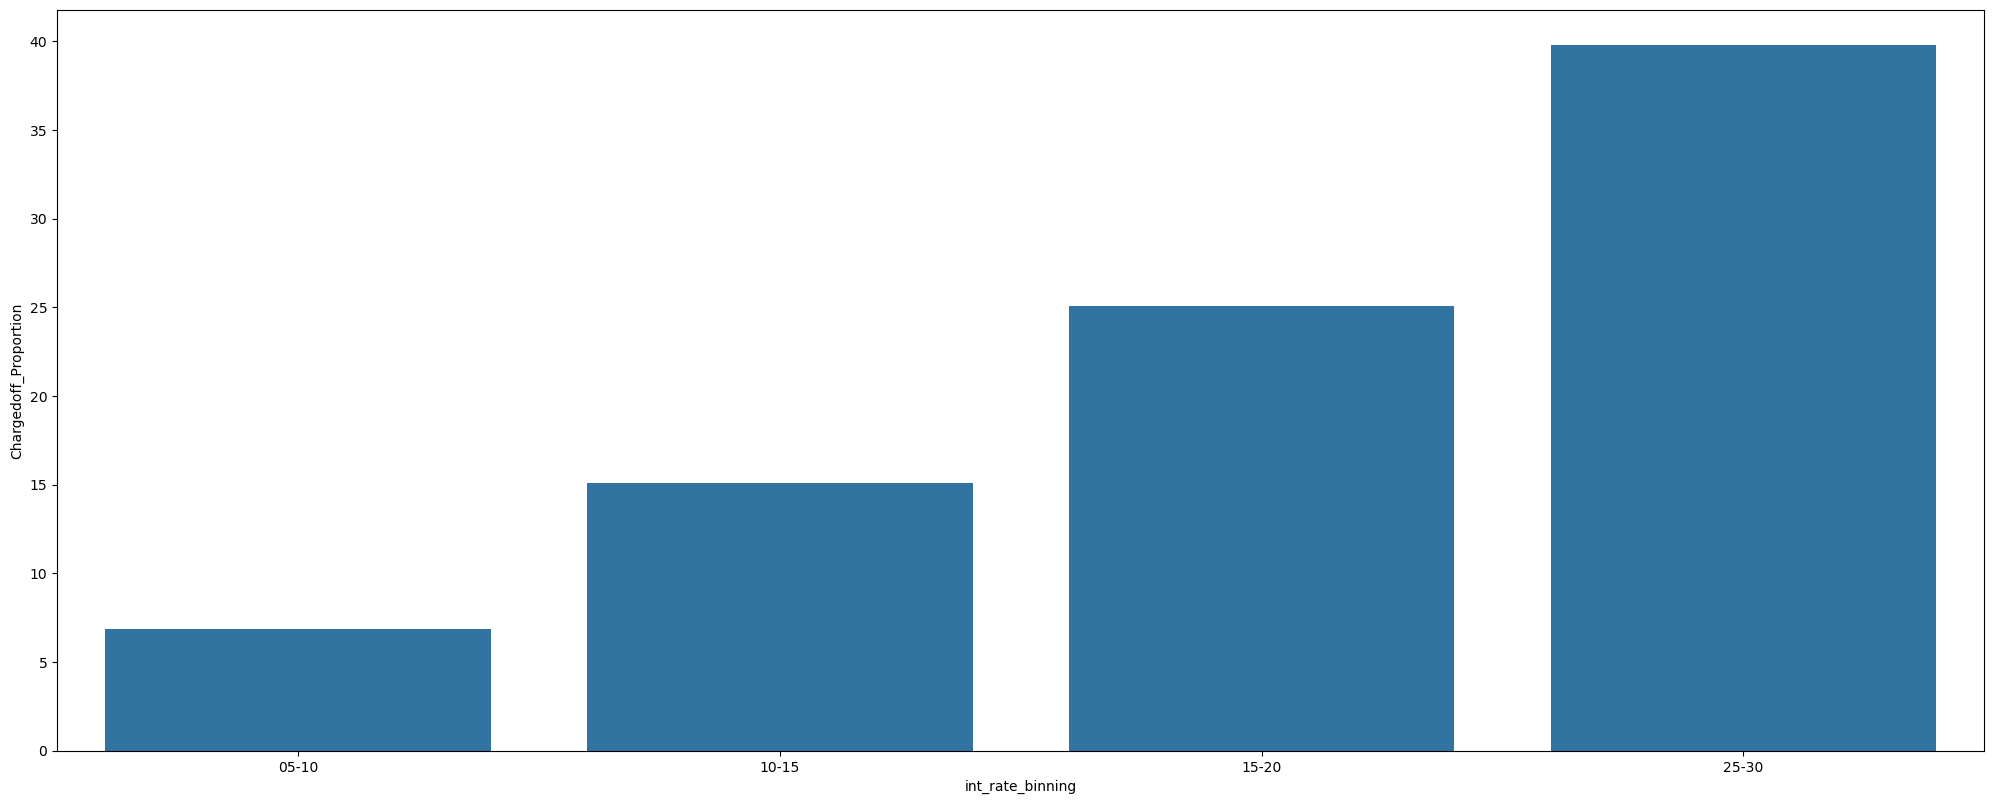

loan_status,int_rate_binning,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
3,25-30,271,410,681,39.794420,60.205580
2,15-20,1709,5102,6811,25.091763,74.908237
1,10-15,2639,14818,17457,15.117145,84.882855
0,05-10,812,11056,11868,6.841928,93.158072


In [44]:
#visualising intrest vs Laon status
clean_df['int_rate_binning'] = pd.cut(clean_df['int_rate'], [5, 10, 15, 20, 25], labels=['05-10', '10-15', '15-20', '25-30'])
tab,char=loanstatusdef('int_rate_binning', 'loan_status')
pd.DataFrame(tab)

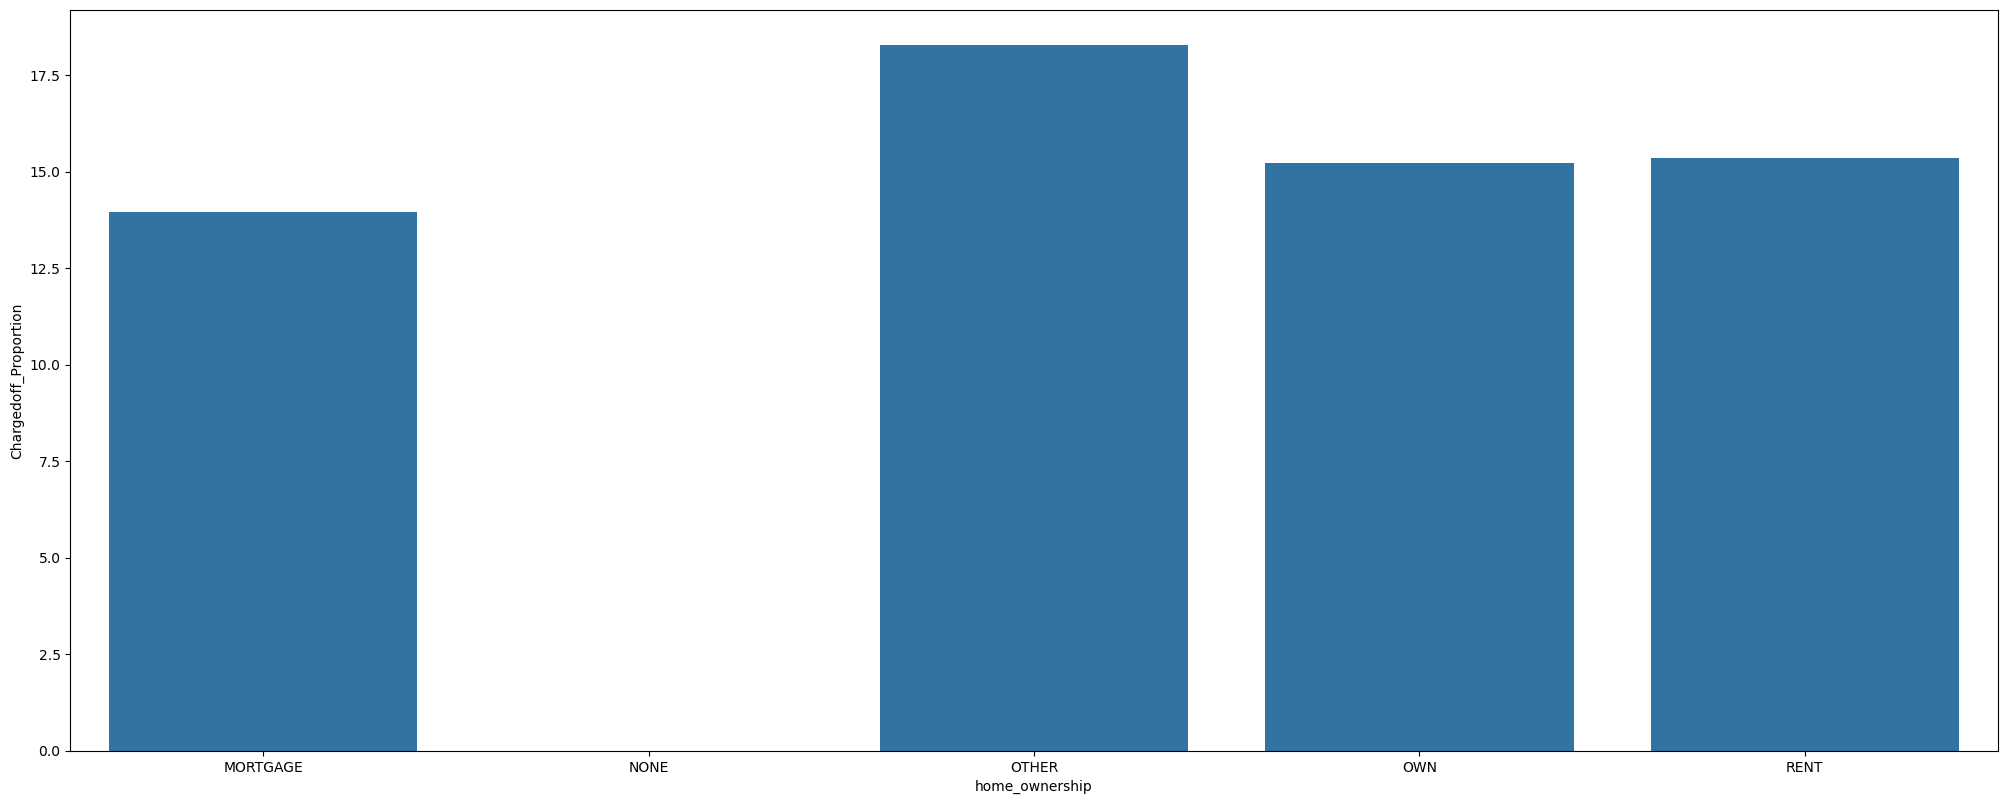

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
2,OTHER,17.0,76.0,93.0,18.279570,81.720430
4,RENT,2774.0,15290.0,18064.0,15.356510,84.643490
3,OWN,436.0,2426.0,2862.0,15.234102,84.765898
0,MORTGAGE,2204.0,13591.0,15795.0,13.953783,86.046217
1,NONE,0.0,3.0,3.0,0.000000,100.000000


In [45]:
tab,char=loanstatusdef('home_ownership', 'loan_status')
pd.DataFrame(tab)

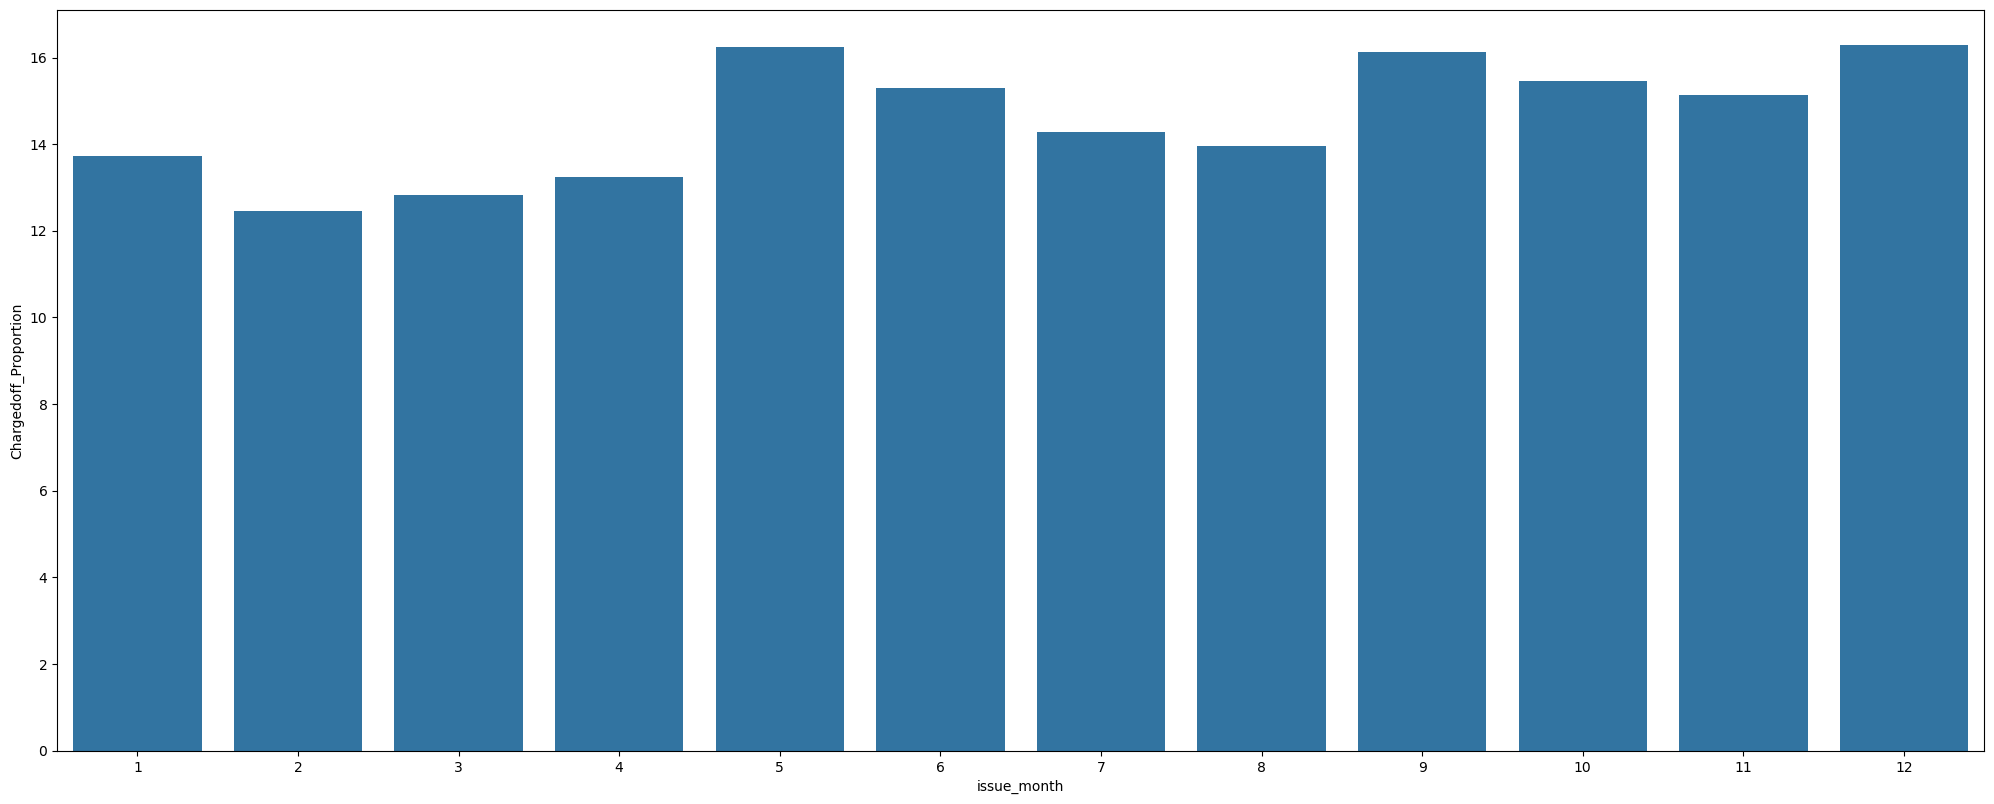

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
11,12,658,3382,4040,16.287129,83.712871
4,5,455,2345,2800,16.250000,83.750000
8,9,533,2770,3303,16.136845,83.863155
9,10,549,3001,3550,15.464789,84.535211
5,6,463,2564,3027,15.295672,84.704328
10,11,580,3254,3834,15.127804,84.872196
6,7,459,2753,3212,14.290162,85.709838
7,8,451,2779,3230,13.962848,86.037152
0,1,312,1962,2274,13.720317,86.279683
3,4,360,2361,2721,13.230430,86.769570


In [46]:
tab,char=loanstatusdef('issue_month', 'loan_status')
pd.DataFrame(tab)

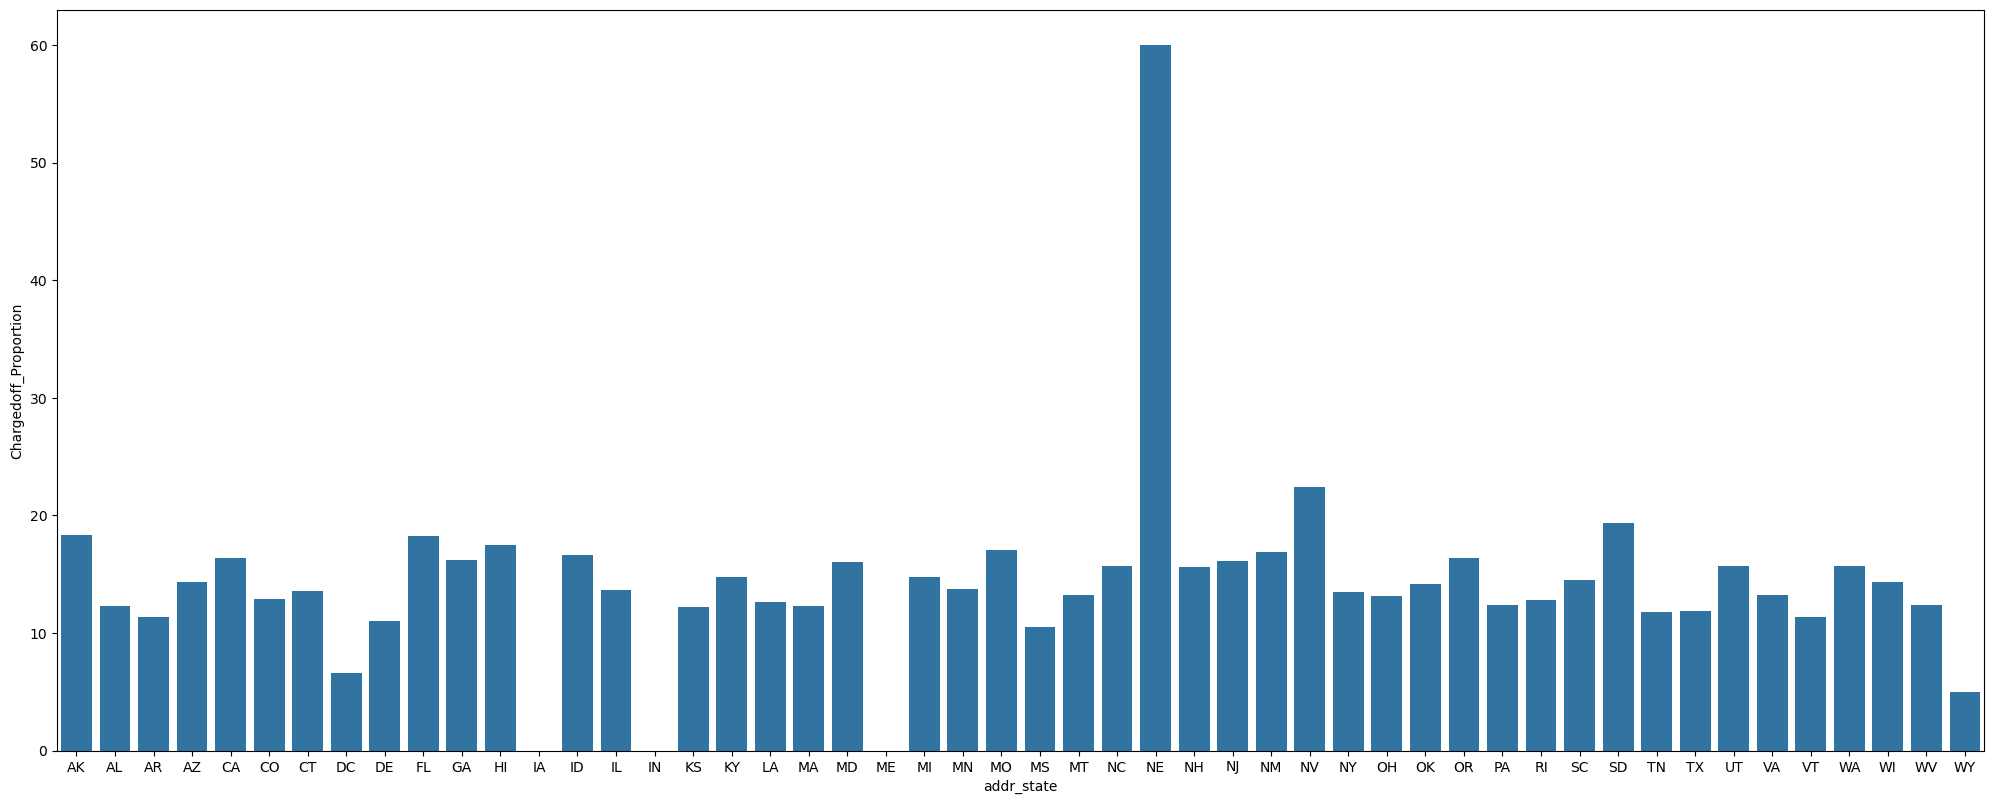

In [47]:
char=loanstatusdef('addr_state', 'loan_status')

## Scatter Plots

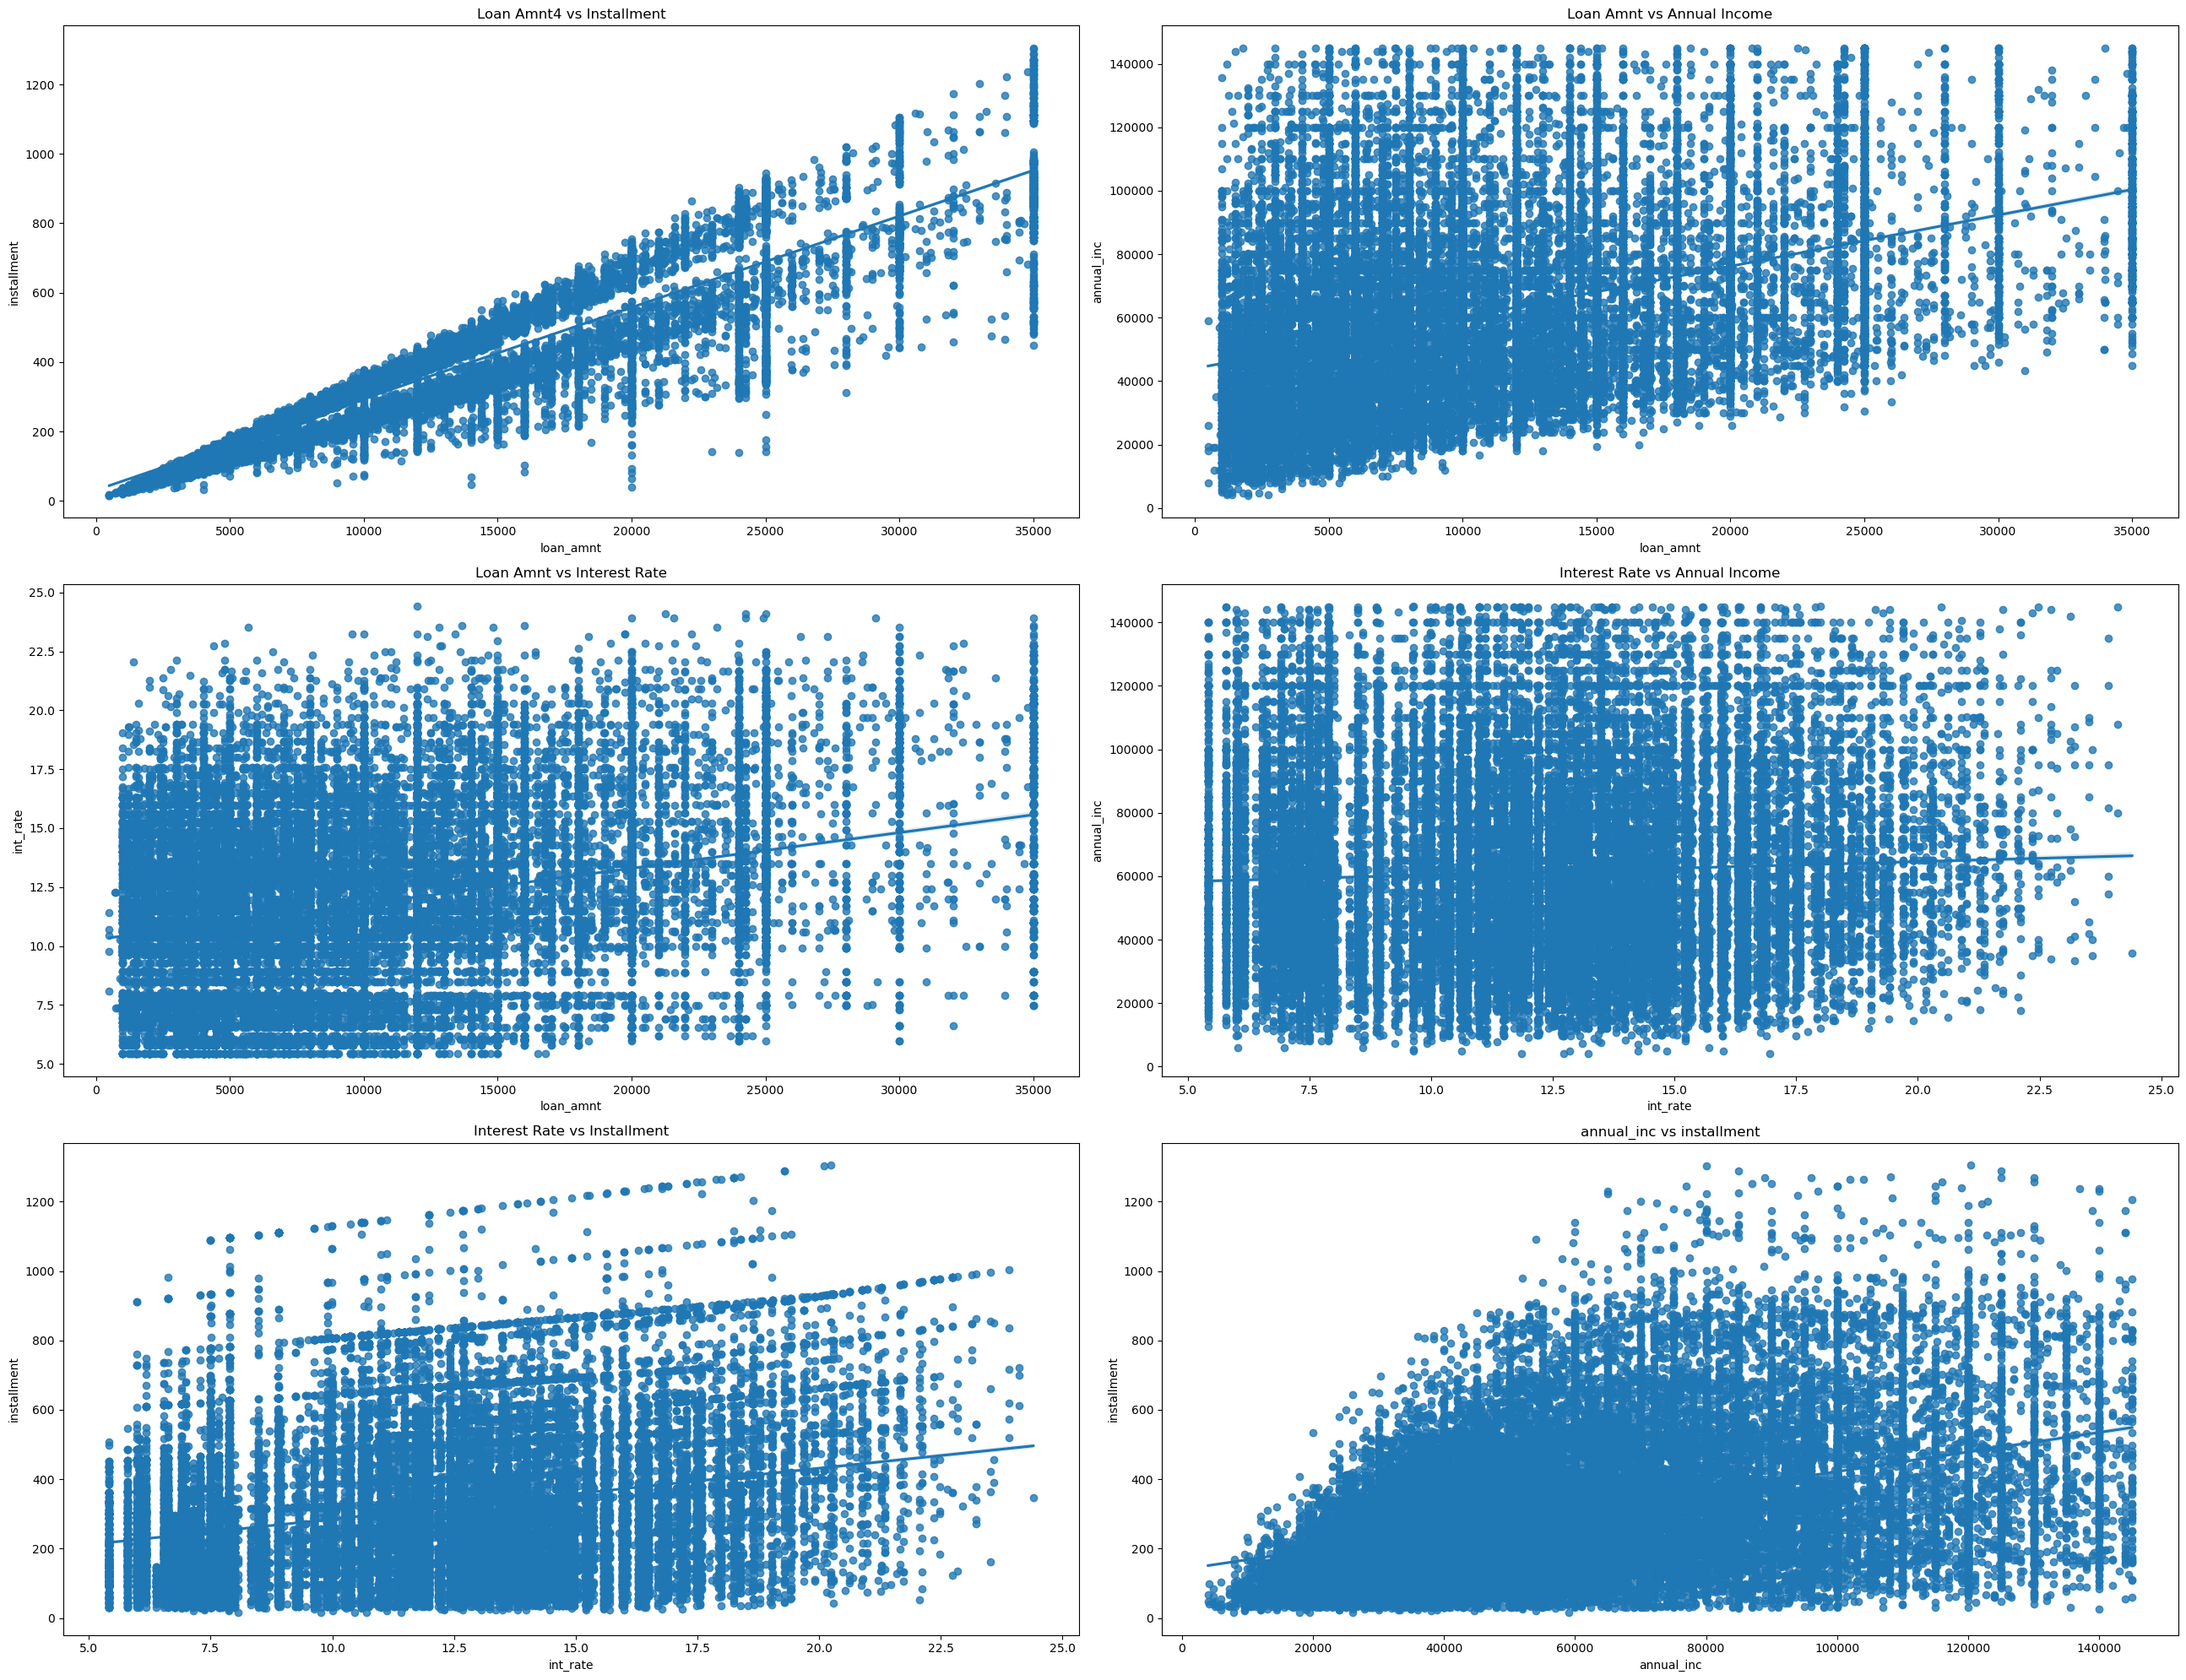

In [49]:
# Scatter Plots

fig, axis = plt.subplots(3, 2, figsize = (26,20))

sns.regplot(ax = axis[0,0], data = clean_df, x = "loan_amnt", y = "installment")
axis[0,0].set_title('Loan Amnt4 vs Installment')

sns.regplot(ax = axis[0,1], data = clean_df, x = "loan_amnt", y = "annual_inc")
axis[0,1].set_title('Loan Amnt vs Annual Income')

#sns.regplot(ax = axis[1,0], data = clean_df, x = "loan_amnt", y = "installment")
#axis[1,0].set_title('Fully Paid - Loan Amnt vs Installment')

#sns.regplot(ax = axis[1,1], data = clean_df, x = "loan_amnt", y = "annual_inc")
#axis[1,1].set_title('Fully Paid - Loan Amnt vs Annual Income')

sns.regplot(ax = axis[1,0], data = clean_df, x = "loan_amnt", y = "int_rate")
axis[1,0].set_title('Loan Amnt vs Interest Rate')

#sns.regplot(ax = axis[2,1], data = clean_df, x = "loan_amnt", y = "int_rate")
#axis[2,1].set_title('Fully Paid - Loan Amnt vs Interest Rate')

sns.regplot(ax = axis[1,1], data = clean_df, x = "int_rate", y = "annual_inc")
axis[1,1].set_title('Interest Rate vs Annual Income')

sns.regplot(ax = axis[2,0], data = clean_df, x = "int_rate", y = "installment")
axis[2,0].set_title('Interest Rate vs Installment')

sns.regplot(ax = axis[2,1], data = clean_df, x = "annual_inc", y = "installment")
axis[2,1].set_title('annual_inc vs installment')

#sns.regplot(ax = axis[4,0], data = clean_df, x = "int_rate", y = "annual_inc")
#axis[4,0].set_title('Fully Paid - Interest Rate vs Annual Income')

#sns.regplot(ax = axis[4,1], data = clean_df, x = "int_rate", y = "installment")
#axis[4,1].set_title('Interest Rate vs Installment')


plt.tight_layout()

plt.show()

# Multi variant Analysis

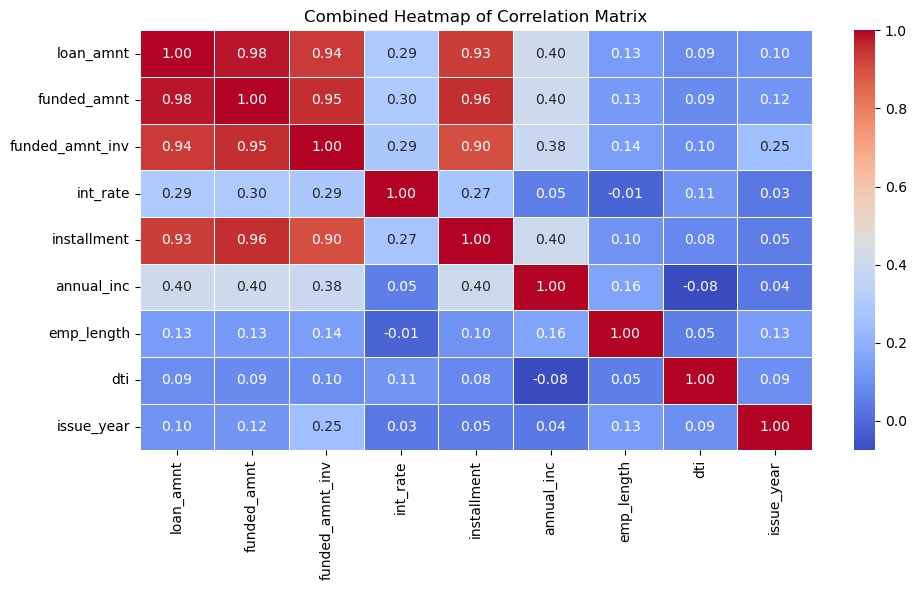

In [51]:
fig, axis = plt.subplots(1,1, figsize = (10,6))

sns.heatmap(clean_df[["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate','installment','annual_inc','emp_length','dti','issue_year']].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Combined Heatmap of Correlation Matrix')

plt.tight_layout()

plt.show()